<a href="https://colab.research.google.com/github/steeve85ok/SIM_YAC_ALMEIDA_UPSE2023/blob/main/ejercicio24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

24.	Resuelva el siguiente ejercicio implementando un esquema explicito obteniendo distribución de Presiones en PSI y Caudales en Ft^3/Hora

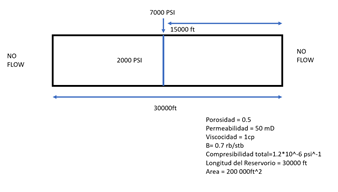

In [1]:
import numpy  as np
import math

In [2]:
L=30000                 #Longitud total del yacimiento ft
dx=150                  #espacios entre nodos
Tiempo=100000           # tiempo en días es obtenido por (numero de iteraciones * dt= numero de días)
DT=10                   # intervalo de tiempo por día
K=50                    #Permeabilidad MD
por=0.5                 #porosidad
vis=1                   # centipoise      #viscosidad
Beta=0.7                #factor volumetrico
CompTotal=1.2**(-6)     #psi-1 #compresibilidad total
A=200000                #ft^2           #area de yacimiento

In [4]:

Alpha=K/(vis*por*CompTotal)
Alpha
Eta=(Alpha*DT)/(dx**2) #por lo general eta es < que 0.5 para que el sistema sea estable
Eta

0.13271039999999995

In [ ]:
#Esquema Explícito Pi(**)n+1=Pi(**)n + alphaDT/dx**2 [Pi-1(**)n - 2Pi(**)n + Pi+1(**)n], considerar Eta=alphaDT/dx2, Estable: Eta menor 0.5
def Presdt(P0,P1,P2,Eta):    # (funcion esquema eplicito usando Eta en lugar DT y dx)
  Pdt=P1+Eta*(P0-(2*P1)+P2)
  return(Pdt)
#corrección de condicion de frontera de dirichlet generalmente se la usa en la frontera izquierda   Pi(**)n+1 = eta(2Pbizq-Pi(**)n) + (1-2eta)Pi(**)n + eta Pi+1(**)n
Pexplicita=np.zeros((Tiempo//DT,(L//dx)+2)) #  matriz que va a guardar todos los resultados. Filas N: Iteraciones, Columnas m: numero de Nodos (+2 que son las fronteras)


In [ ]:
#Condiciones iniciales
Pyac=2000                 # presion de yacimiento
Piz=0                  #presion frontera izquierda psi
Pder=1000                   # presion frontera derecha psi
Pin=np.ones((L//dx)+2)    # la corrección de condiciones de frontera es añadir dos nodos uno por extremo, es por esta razon que sumamos 2
Pres=np.zeros((L//dx)+2)  # vector vacio zeros que representa las condiciones iniciales.(cantidad de nodos de la matriz+2) creación de una matriz vacia con las mismas dimensiones de la matriz de donde se guardara todo los resultados
Pres2=np.zeros((L//dx)+2)
Pin=Pin*Pyac              ## definición para obtener las demas celdas de la primera colulmna de la matriz sin contar los extremos
Pin[0]=2*Piz-Pin[1]       # Presión0 corregida esigual a dos veces de la presion de la izquierda menos la presión pinicial de 1
Pin[len(Pin)-1]=2*Pder-Pin[len(Pin)-2] #presión final es igual a  a dos veces la presión de la derecha menos la presión de la anterior que seria la longitud  de Pin menos 2

Pin.shape